<a href="https://colab.research.google.com/github/MadsNL/AMLMain/blob/Mads/AML_IceCores_parametric_umap_on_7th_trained_on_6_withplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1paSsYReykEVDPX8pA2SUf7Gr7Lptq-PX
! unzip Insoluables_TrainingData26May2022.zip
!git clone https://github.com/MadsNL/AMLpackages.git
import sys
sys.path.append('/content/AMLpackages/')
from load_data import training_set, not_training_set
from Models import make_autoencoder, make_NN
! gdown --id 1vmtn2HUFFspLehTO-9HNCnphSdiZGez3
! gdown --id 1vOWLDeQh2EEyH2J3VH5XZHhTLqMqAjkV
! gdown --id 1fv_xxclDQrccHZ-T00-cVYHIMFaYjklA
! gdown --id 1NATGxPWVYS71Y-dwPZQvrE7BdsoSpVP8
! unzip autoencoder_128.zip
! unzip encoder_128.zip
! unzip NN_scalar_encoder_128.zip
! unzip NN_last_layer_scalar_encoder_128.zip
!pip install pyyaml h5py 
!pip install umap-learn
!pip install bayesian-optimization


Streaming output truncated to the last 5000 lines.
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5597.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5598.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5599.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_56.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_560.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5600.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5601.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5602.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5603.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5604.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5605.png  
  inflating: Insoluables_Tra

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import umap
from umap.parametric_umap import ParametricUMAP
import seaborn as sb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [7]:
sup_path = '/content/Insoluables_TrainingData/train/'
sup_im_path = '/content/Insoluables_TrainingData/train/'
sup_df = pd.read_csv(sup_path+'train.csv')
train_df, test_df = train_test_split(sup_df, test_size=0.2, random_state=37)
train = training_set(train_df, sup_im_path)
test = training_set(test_df, sup_im_path)

In [12]:
train_size = len(train.labels)
test_size = len(test.labels)

In [13]:
encoder = keras.models.load_model('encoder_128')

In [14]:


increment = 5000
nr_its = train_size//increment
points_left_over = train_size % increment

list_of_encoded_images = []
x_train_lab = []
x_train_feats = []
image_count = 0
for i in range(nr_its):
  # create encoder training
  x_train = []
  for j in range(increment):
      im, lab, feat = train.__getitem__(image_count)
      image_count += 1
      x_train.append(im)
      x_train_lab.append(lab)
      x_train_feats.append(feat)
  x_train = np.array(x_train)

  encoded = encoder.predict(x_train)

  list_of_encoded_images.extend(encoded)

x_train = []
for i in range(points_left_over):
  im, lab, feat = train.__getitem__(image_count)
  image_count += 1
  x_train.append(im)
  x_train_lab.append(lab)
  x_train_feats.append(feat)
x_train = np.array(x_train)

encoded = encoder.predict(x_train)

list_of_encoded_images.extend(encoded)

list_of_encoded_images = np.array(list_of_encoded_images)

x_train = []
for i in range(len(list_of_encoded_images)):
  one = np.append(x_train_feats[i], list_of_encoded_images[i])
  x_train.append(one)

x_train = np.array(x_train)
x_train_lab = np.array(x_train_lab)


increment = 5000
nr_its = test_size//increment
points_left_over = test_size % increment

list_of_encoded_images = []
x_test_lab = []
x_test_feats = []
image_count = 0
for i in range(nr_its):
  x_test = []
  for j in range(increment):
      im, lab, feat = test.__getitem__(image_count)
      image_count += 1
      x_test.append(im)
      x_test_lab.append(lab)
      x_test_feats.append(feat)
  x_test = np.array(x_test)

  encoded = encoder.predict(x_test)

  list_of_encoded_images.extend(encoded)

x_test = []
for i in range(points_left_over):
  im, lab, feat = test.__getitem__(image_count)
  image_count += 1
  x_test.append(im)
  x_test_lab.append(lab)
  x_test_feats.append(feat)
x_test = np.array(x_test)

encoded = encoder.predict(x_test)

list_of_encoded_images.extend(encoded)

list_of_encoded_images = np.array(list_of_encoded_images)

x_test = []
for i in range(len(list_of_encoded_images)):
  one = np.append(x_test_feats[i], list_of_encoded_images[i])
  x_test.append(one)

x_test = np.array(x_test)
x_test_lab = np.array(x_test_lab)



Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1972/1972 [==============================] - 24s 11ms/step - loss: 0.5222 - accuracy: 0.8006 - val_loss: 0.4042 - val_accuracy: 0.8441
Epoch 2/200
1972/1972 [==============================] - 18s 9ms/step - loss: 0.3883 - accuracy: 0.8494 - val_loss: 0.3032 - val_accuracy: 0.8852
Epoch 3/200
1972/1972 [==============================] - 13s 7ms/step - loss: 0.3525 - accuracy: 0.8622 - val_loss: 0.2859 - val_accuracy: 0.8871
Epoch 4/200
1972/1972 [==============================] - 13s 7ms/step - loss: 0.3273 - accuracy: 0.8722 - val_loss: 0.2768 - val_accuracy: 0.8889
Epoch 5/200
1972/1972 [==============================] - 13s 7ms/step - loss: 0.3076 - accuracy: 0.8799 - val_loss: 0.2786 - val_accuracy: 0.8926
Epoch 6/200
1972/1972 [==============================] - 13s 7ms/step - loss: 0.2918 - accuracy: 0.8820 - val_loss: 0.2737 - val_accuracy: 0.8915
Epoch 7/200
1972/1972 [==============================] - 13s 7ms/step - loss: 0.2756 - accuracy: 0.8903 - val_loss: 0.2492 - val_accura

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3153/3153 [==============================] - 23s 7ms/step - loss: 0.6070 - accuracy: 0.7823 - val_loss: 0.4677 - val_accuracy: 0.8346
Epoch 2/200
3153/3153 [==============================] - 21s 7ms/step - loss: 0.4812 - accuracy: 0.8229 - val_loss: 0.4445 - val_accuracy: 0.8439
Epoch 3/200
3153/3153 [==============================] - 21s 7ms/step - loss: 0.4419 - accuracy: 0.8375 - val_loss: 0.3984 - val_accuracy: 0.8553
Epoch 4/200
3153/3153 [==============================] - 22s 7ms/step - loss: 0.4167 - accuracy: 0.8457 - val_loss: 0.3800 - val_accuracy: 0.8640
Epoch 5/200
3153/3153 [==============================] - 21s 7ms/step - loss: 0.3940 - accuracy: 0.8557 - val_loss: 0.3628 - val_accuracy: 0.8704
Epoch 6/200
3153/3153 [==============================] - 21s 7ms/step - loss: 0.3771 - accuracy: 0.8611 - val_loss: 0.3705 - val_accuracy: 0.8670
Epoch 7/200
3153/3153 [==============================] - 21s 7ms/step - loss: 0.3627 - accuracy: 0.8668 - val_loss: 0.3453 - val_accurac

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2636/2636 [==============================] - 18s 7ms/step - loss: 0.6720 - accuracy: 0.7604 - val_loss: 0.5133 - val_accuracy: 0.8041
Epoch 2/200
2636/2636 [==============================] - 17s 6ms/step - loss: 0.5368 - accuracy: 0.8002 - val_loss: 0.4666 - val_accuracy: 0.8276
Epoch 3/200
2636/2636 [==============================] - 17s 6ms/step - loss: 0.4938 - accuracy: 0.8157 - val_loss: 0.4363 - val_accuracy: 0.8403
Epoch 4/200
2636/2636 [==============================] - 18s 7ms/step - loss: 0.4632 - accuracy: 0.8277 - val_loss: 0.4248 - val_accuracy: 0.8389
Epoch 5/200
2636/2636 [==============================] - 17s 6ms/step - loss: 0.4422 - accuracy: 0.8363 - val_loss: 0.4048 - val_accuracy: 0.8500
Epoch 6/200
2636/2636 [==============================] - 18s 7ms/step - loss: 0.4283 - accuracy: 0.8417 - val_loss: 0.4228 - val_accuracy: 0.8410
Epoch 7/200
2636/2636 [==============================] - 17s 6ms/step - loss: 0.4139 - accuracy: 0.8475 - val_loss: 0.3879 - val_accurac

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3001/3001 [==============================] - 22s 7ms/step - loss: 0.4701 - accuracy: 0.8234 - val_loss: 0.3007 - val_accuracy: 0.8812
Epoch 2/200
3001/3001 [==============================] - 20s 7ms/step - loss: 0.3524 - accuracy: 0.8612 - val_loss: 0.2791 - val_accuracy: 0.8919
Epoch 3/200
3001/3001 [==============================] - 20s 7ms/step - loss: 0.3169 - accuracy: 0.8753 - val_loss: 0.2744 - val_accuracy: 0.8936
Epoch 4/200
3001/3001 [==============================] - 20s 7ms/step - loss: 0.2939 - accuracy: 0.8841 - val_loss: 0.2534 - val_accuracy: 0.9012
Epoch 5/200
3001/3001 [==============================] - 19s 6ms/step - loss: 0.2757 - accuracy: 0.8913 - val_loss: 0.2427 - val_accuracy: 0.8992
Epoch 6/200
3001/3001 [==============================] - 19s 6ms/step - loss: 0.2626 - accuracy: 0.8958 - val_loss: 0.2194 - val_accuracy: 0.9091
Epoch 7/200
3001/3001 [==============================] - 20s 7ms/step - loss: 0.2510 - accuracy: 0.8999 - val_loss: 0.2210 - val_accurac

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3084/3084 [==============================] - 16s 5ms/step - loss: 0.5344 - accuracy: 0.8185 - val_loss: 0.3787 - val_accuracy: 0.8640
Epoch 2/200
3084/3084 [==============================] - 14s 5ms/step - loss: 0.4135 - accuracy: 0.8554 - val_loss: 0.3563 - val_accuracy: 0.8825
Epoch 3/200
3084/3084 [==============================] - 14s 5ms/step - loss: 0.3744 - accuracy: 0.8700 - val_loss: 0.3192 - val_accuracy: 0.8883
Epoch 4/200
3084/3084 [==============================] - 15s 5ms/step - loss: 0.3479 - accuracy: 0.8781 - val_loss: 0.2973 - val_accuracy: 0.8954
Epoch 5/200
3084/3084 [==============================] - 14s 5ms/step - loss: 0.3301 - accuracy: 0.8845 - val_loss: 0.2928 - val_accuracy: 0.8964
Epoch 6/200
3084/3084 [==============================] - 15s 5ms/step - loss: 0.3122 - accuracy: 0.8912 - val_loss: 0.3029 - val_accuracy: 0.8991
Epoch 7/200
3084/3084 [==============================] - 14s 5ms/step - loss: 0.3036 - accuracy: 0.8950 - val_loss: 0.2802 - val_accurac

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3072/3072 [==============================] - 22s 7ms/step - loss: 0.5460 - accuracy: 0.8142 - val_loss: 0.3963 - val_accuracy: 0.8626
Epoch 2/200
3072/3072 [==============================] - 21s 7ms/step - loss: 0.4227 - accuracy: 0.8533 - val_loss: 0.3748 - val_accuracy: 0.8698
Epoch 3/200
3072/3072 [==============================] - 20s 6ms/step - loss: 0.3844 - accuracy: 0.8661 - val_loss: 0.3197 - val_accuracy: 0.8865
Epoch 4/200
3072/3072 [==============================] - 20s 6ms/step - loss: 0.3588 - accuracy: 0.8750 - val_loss: 0.3299 - val_accuracy: 0.8924
Epoch 5/200
3072/3072 [==============================] - 20s 7ms/step - loss: 0.3375 - accuracy: 0.8825 - val_loss: 0.3049 - val_accuracy: 0.8932
Epoch 6/200
3072/3072 [==============================] - 20s 7ms/step - loss: 0.3218 - accuracy: 0.8873 - val_loss: 0.2913 - val_accuracy: 0.8990
Epoch 7/200
3072/3072 [==============================] - 20s 7ms/step - loss: 0.3077 - accuracy: 0.8928 - val_loss: 0.3007 - val_accurac

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3059/3059 [==============================] - 21s 6ms/step - loss: 0.4535 - accuracy: 0.8447 - val_loss: 0.3382 - val_accuracy: 0.8886
Epoch 2/200
3059/3059 [==============================] - 20s 6ms/step - loss: 0.3465 - accuracy: 0.8777 - val_loss: 0.2711 - val_accuracy: 0.9035
Epoch 3/200
3059/3059 [==============================] - 20s 7ms/step - loss: 0.3122 - accuracy: 0.8897 - val_loss: 0.2755 - val_accuracy: 0.9033
Epoch 4/200
3059/3059 [==============================] - 20s 6ms/step - loss: 0.2911 - accuracy: 0.8966 - val_loss: 0.2524 - val_accuracy: 0.9114
Epoch 5/200
3059/3059 [==============================] - 20s 6ms/step - loss: 0.2717 - accuracy: 0.9033 - val_loss: 0.2558 - val_accuracy: 0.9157
Epoch 6/200
3059/3059 [==============================] - 20s 6ms/step - loss: 0.2606 - accuracy: 0.9064 - val_loss: 0.2351 - val_accuracy: 0.9135
Epoch 7/200
3059/3059 [==============================] - 20s 7ms/step - loss: 0.2468 - accuracy: 0.9108 - val_loss: 0.2382 - val_accurac

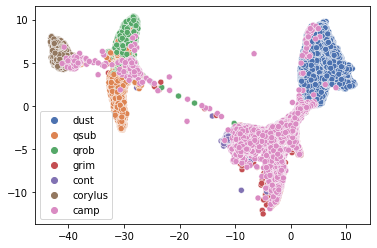

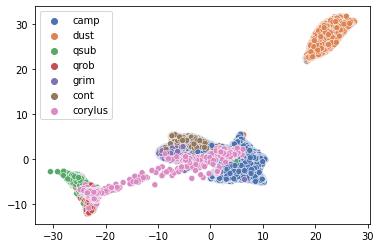

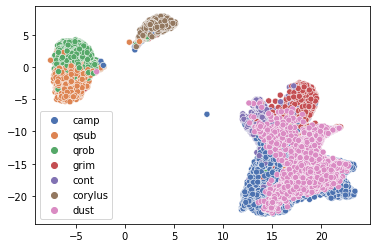

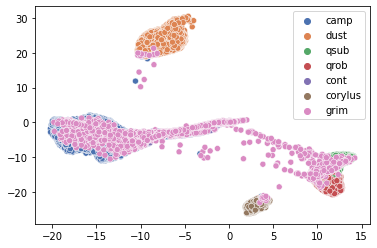

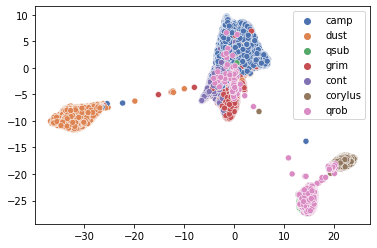

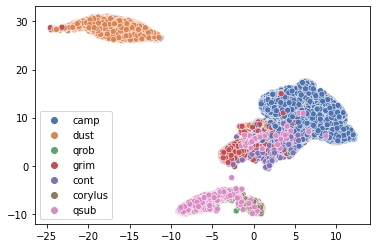

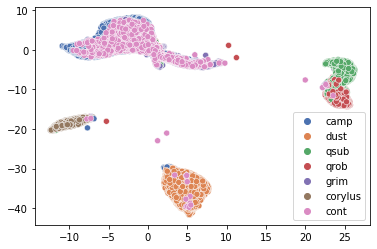

In [22]:
types = np.array(['camp', 'corylus', 'dust', 'grim', 'qrob', 'qsub', 'cont'])

for i in range(7):

  nn_train = x_train[x_train_lab!=i]
  nn_train_labels = x_train_lab[x_train_lab!=i]

  data_use = x_test[x_test_lab!=i]
  labels_use = x_test_lab[x_test_lab!=i]
  labels_use_plot = types[labels_use]
  data_extra = x_test[x_test_lab==i]
  labels_extra = x_test_lab[x_test_lab==i]
  labels_extra_plot = types[labels_extra]

  nn_model, nn_last_hidden = make_NN()

  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)

  nn_model.fit(nn_train, nn_train_labels, batch_size=32, epochs=200, validation_split=0.1, callbacks=[callback])

  last_hidden_vals = nn_last_hidden.predict(data_use) #x_train_feats[i], y_preds[i], x_train_with_encoded

  map = ParametricUMAP(n_components=2)#, n_neighbors=8, min_dist=0.05)
  y = map.fit_transform(last_hidden_vals)

  plotx = np.array(y[:, 0]).copy()
  ploty = np.array(y[:, 1]).copy()

  last_hidden_vals = nn_last_hidden.predict(data_extra)
  y = map.transform(last_hidden_vals)

  plotx = np.append(plotx, np.array(y[:, 0]))
  ploty = np.append(ploty, np.array(y[:, 1]))

  plothue = np.append(labels_use_plot, labels_extra_plot)

  plt.figure()

  sb.scatterplot(x=plotx, y=ploty, hue = plothue, palette='deep')

  plt.savefig(str(i)+'para.png')

#plt.show()